In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn import linear_model
from plotly.offline import init_notebook_mode, iplot, plot
import plotly.graph_objects as go
import plotly.express as px


In [86]:
import glob
import os

# setting the path for joining multiple files
files = os.path.join("../data/", "*.csv")

# list of merged files returned
files = glob.glob(files)

print("Resultant CSV after joining all CSV files at a particular location...");

# joining files with concat and read_csv
data = pd.concat(map(pd.read_csv, files), ignore_index=True)
data.shape

Resultant CSV after joining all CSV files at a particular location...


(26752, 22)

In [87]:
data.columns = ['Artist_Name', 'Track_Name', 'Popularity', 'Genres', 'Playlist',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'id', 'uri', 'track_href', 'analysis_url', 'duration_ms',
       'time_signature']

In [94]:
df = data.drop_duplicates(subset =["Track_Name", "Artist_Name"],keep = 'first')
df.shape

(18554, 22)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18554 entries, 0 to 26751
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Artist_Name       18554 non-null  object 
 1   Track_Name        18554 non-null  object 
 2   Popularity        18554 non-null  int64  
 3   Genres            18554 non-null  object 
 4   Playlist          18554 non-null  object 
 5   danceability      18554 non-null  float64
 6   energy            18554 non-null  float64
 7   key               18554 non-null  int64  
 8   loudness          18554 non-null  float64
 9   mode              18554 non-null  int64  
 10  speechiness       18554 non-null  float64
 11  acousticness      18554 non-null  float64
 12  instrumentalness  18554 non-null  float64
 13  liveness          18554 non-null  float64
 14  valence           18554 non-null  float64
 15  tempo             18554 non-null  float64
 16  id                18554 non-null  object

In [26]:
df.isna().any()

Artist_Name         False
Track_Name          False
Popularity          False
Genres              False
Playlist            False
danceability        False
energy              False
key                 False
loudness            False
mode                False
speechiness         False
acousticness        False
instrumentalness    False
liveness            False
valence             False
tempo               False
id                  False
uri                 False
track_href          False
analysis_url        False
duration_ms         False
time_signature      False
dtype: bool

## Target Variable - Popularity

In [27]:
df['Popularity'].min(), df['Popularity'].max()

(0, 100)

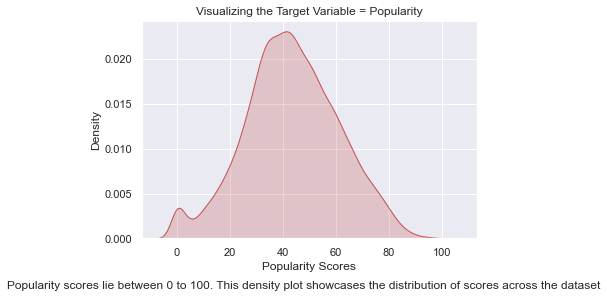

In [28]:
sns.set(style="darkgrid")
 
# plotting both distibutions on the same figure
fig = sns.kdeplot(df['Popularity'], fill=True, color="r")
plt.title("Visualizing the Target Variable = Popularity")
plt.xlabel("Popularity Scores")
txt="Popularity scores lie between 0 to 100. This density plot showcases the distribution of scores across the dataset"
plt.figtext(0.5, -0.05, txt, wrap=True, horizontalalignment='center', fontsize=12)
plt.show()

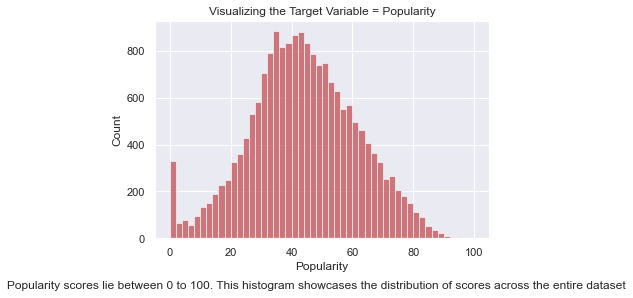

In [29]:
fig = sns.histplot(df['Popularity'], bins = 50,color="r")
plt.title("Visualizing the Target Variable = Popularity")
txt="Popularity scores lie between 0 to 100. This histogram showcases the distribution of scores across the entire dataset"
plt.figtext(0.5, -0.05, txt, wrap=True, horizontalalignment='center', fontsize=12)
plt.savefig("../graphs/popularity_scores_distribution.png", bbox_inches="tight")

In [30]:
df['Popularity'].describe()

count    18554.000000
mean        43.306295
std         17.671985
min          0.000000
25%         32.000000
50%         43.000000
75%         55.000000
max        100.000000
Name: Popularity, dtype: float64

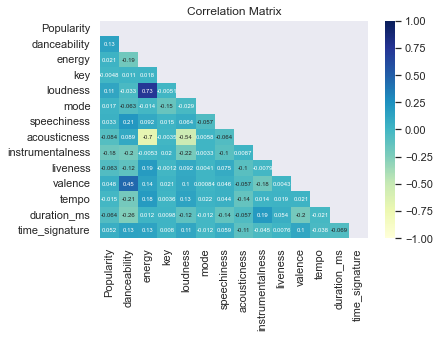

In [31]:
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True, vmin=-1, vmax=1, annot_kws={"fontsize":6},  mask=np.triu(df.corr()))
plt.title("Correlation Matrix")
plt.savefig("../graphs/correlation_matrix.png", bbox_inches="tight")

## EDA on Features

In [32]:
# how many unique songs are there in the dataset?
len(df['Track_Name'].unique()), df.shape

(17239, (18554, 22))

In [33]:
df['Track_Name'].value_counts()

Trouble                                                            8
Voices                                                             8
Ghost                                                              8
Dreams                                                             8
Control                                                            8
                                                                  ..
Boyz                                                               1
Hey Stupid, I Love You - Spanglish Version                         1
Ur Gonna Wish U Believed Me                                        1
Stacy's Mom                                                        1
A Plague Of Lighthouse Keepers (Medley) - 2005 Digital Remaster    1
Name: Track_Name, Length: 17239, dtype: int64

In [35]:
df[df['Track_Name']=='Trouble'][['Artist_Name', 'Track_Name', 'Popularity']]

,Artist_Name,Track_Name,Popularity
8555,Shampoo,Trouble,43
11383,D Double E,Trouble,48
18641,Cage The Elephant,Trouble,73
19157,Parti!,Trouble,23
19915,The New Respects,Trouble,43
20571,Jane n' the Jungle,Trouble,42
22314,Adam Jensen,Trouble,48
23516,Coldplay,Trouble,72


In [36]:
missing=pd.DataFrame({'Column Name': df.columns,'Missing Records Percentage': df.isnull().sum() * 100 / df.shape[0]})
missing.reset_index(inplace = True, drop = True)
missing

,Column Name,Missing Records Percentage
0,Artist_Name,0.0
1,Track_Name,0.0
2,Popularity,0.0
3,Genres,0.0
4,Playlist,0.0
5,danceability,0.0
6,energy,0.0
7,key,0.0
8,loudness,0.0
9,mode,0.0


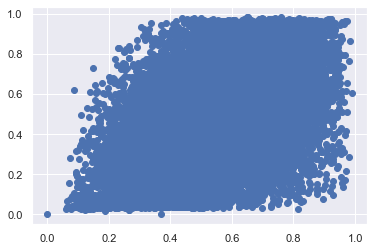

In [37]:
# Does the mood of the song affect danceability?
plt.scatter(df['danceability'], df['valence'])
plt.show()

In [38]:
df['valence'].describe()

count    18554.000000
mean         0.486302
std          0.237177
min          0.000000
25%          0.301000
50%          0.481000
75%          0.669000
max          0.986000
Name: valence, dtype: float64

In [39]:
len(df['Genres'].unique())

5768

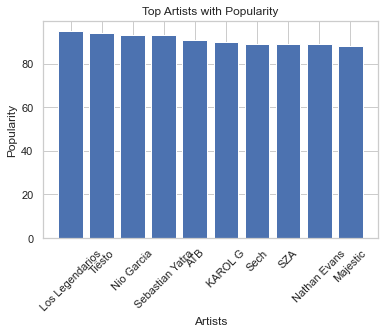

In [40]:
sns.set(style="whitegrid")
x = df.groupby("Artist_Name")["Popularity"].mean().sort_values(ascending=False).head(10)
ax = plt.bar(x.index, x)
plt.title('Top Artists with Popularity')
plt.ylabel('Popularity')
plt.xlabel('Artists')
plt.xticks(rotation = 45)
plt.show()

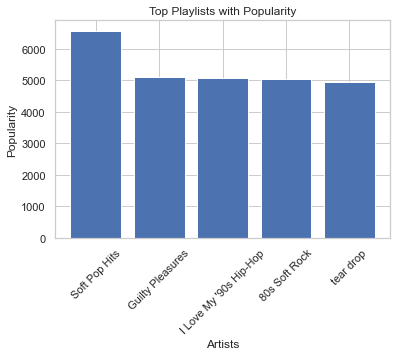

In [41]:
sns.set(style="whitegrid")
x = df.groupby("Playlist")["Popularity"].sum().sort_values(ascending=False).head(5)
ax = plt.bar(x.index, x)
plt.title('Top Playlists with Popularity')
plt.ylabel('Popularity')
plt.xlabel('Artists')
plt.xticks(rotation = 45)
plt.show()

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18554 entries, 0 to 26751
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Artist_Name       18554 non-null  object 
 1   Track_Name        18554 non-null  object 
 2   Popularity        18554 non-null  int64  
 3   Genres            18554 non-null  object 
 4   Playlist          18554 non-null  object 
 5   danceability      18554 non-null  float64
 6   energy            18554 non-null  float64
 7   key               18554 non-null  int64  
 8   loudness          18554 non-null  float64
 9   mode              18554 non-null  int64  
 10  speechiness       18554 non-null  float64
 11  acousticness      18554 non-null  float64
 12  instrumentalness  18554 non-null  float64
 13  liveness          18554 non-null  float64
 14  valence           18554 non-null  float64
 15  tempo             18554 non-null  float64
 16  id                18554 non-null  object

In [43]:
df[['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']].describe()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,18554.000000,18554.000000,18554.00000,18554.000000,18554.000000,18554.000000,18554.000000,18554.000000,18554.000000,18554.000000
mean,0.550663,0.685337,-7.48425,0.086661,0.209958,0.120403,0.199014,0.486302,123.240495,3.929234
std,0.169173,0.219051,3.50200,0.090623,0.279603,0.258035,0.159602,0.237177,29.606416,0.353779
min,0.000000,0.000020,-34.82500,0.000000,0.000000,0.000000,0.011900,0.000000,0.000000,0.000000
25%,0.436000,0.537000,-9.11300,0.035600,0.003100,0.000001,0.097600,0.301000,99.952250,4.000000
50%,0.551000,0.716000,-6.81700,0.050300,0.061200,0.000313,0.132000,0.481000,120.993500,4.000000
75%,0.670000,0.872000,-5.08225,0.092475,0.339000,0.042475,0.265000,0.669000,142.177000,4.000000
max,0.989000,1.000000,1.35500,0.960000,0.996000,0.996000,0.992000,0.986000,249.438000,5.000000


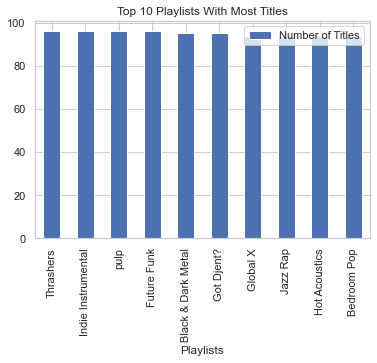

In [44]:
genres = df.Playlist.unique()
titles_in_genre = []
for genre in genres:
    genre_df = df[df['Playlist']==genre]
    titles_in_genre.append(len(genre_df['Track_Name'].unique()))

titles_df = pd.DataFrame({'Playlists':genres, 'Num_Titles': titles_in_genre})
titles_df = titles_df.sort_values(by=['Num_Titles'], ascending=False)

# Top 10 genres with most titles 
titles_df[0:10].plot(x='Playlists', y='Num_Titles', kind='bar', label = "Number of Titles") 
plt.title("Top 10 Playlists With Most Titles")
plt.xticks(rotation = 90)
plt.legend()
plt.show()

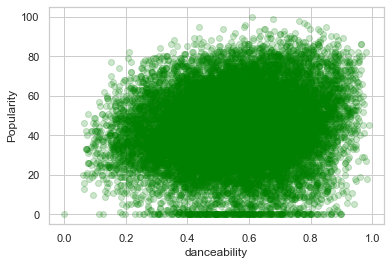

In [45]:
plt.scatter(df['danceability'], df['Popularity'], alpha = 0.2, color = 'green')
plt.xlabel("danceability")
plt.ylabel("Popularity")
plt.show() 

In [46]:
artist_songs = df[['Artist_Name']].value_counts()
artist_songs_df = pd.DataFrame({"Songs":artist_songs})
artist_songs_df = artist_songs_df.reset_index()
artist_songs_df.head()

,Artist_Name,Songs
0,Omer Adam,62
1,Eyal Golan,61
2,Shlomo Artzi,56
3,The Rolling Stones,48
4,Dudu Aharon,46


In [48]:
artist_popularity = df[['Artist_Name', 'Popularity']].groupby('Artist_Name').mean().sort_values(by='Popularity')
artist_popularity_df = artist_popularity.reset_index()
artist_df = pd.merge(artist_popularity_df, artist_songs_df, how='inner', on = 'Artist_Name')
artist_df.sort_values(by='Songs',ascending=False, inplace=True)
artist_df.reset_index(inplace=True)
fig = go.Figure(px.scatter(artist_df[:10], 
           x='Artist_Name', 
           y='Popularity', 
           size = 'Songs',
           size_max=40,
           color='Popularity',
           title='Top 10 artists (based on number of songs) vs average popularity of their top hits',
           hover_name="Songs"
          ))
fig
fig.write_html("../graphs/average_popularity_after_dropping_duplicates.html")

In [50]:
from plotly.subplots import make_subplots

histogram_labels = ['Popularity',
                    'danceability', 
                    'energy'
                   ]

colors = px.colors.qualitative.Vivid
for i in range(len(histogram_labels)):
    fig = px.histogram(df, 
                       histogram_labels[i], 
                       title=f'{histogram_labels[i]} distribution in top hits', 
                       height=400, 
                       width=500,
                       color_discrete_sequence=[colors[i]]
                      )
    iplot(fig)

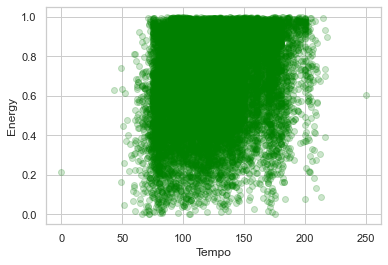

In [51]:
plt.scatter(df['tempo'], df['energy'], alpha = 0.2, color = 'green')
plt.xlabel("Tempo")
plt.ylabel("Energy")
plt.show() 

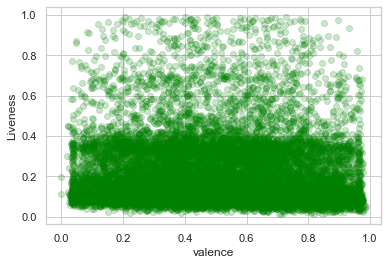

In [52]:
plt.scatter(df['valence'], df['liveness'], alpha = 0.2, color = 'green')
plt.xlabel("valence")
plt.ylabel("Liveness")
plt.show() 

In [53]:
iplot(px.pie(df['key'].value_counts().reset_index(), 
       names=r'C(0) C♯/D♭(1) D(2) E♭/D♯(3) E(4) F(5) F♯/G♭(6) G(7) A♭/G♯(8) A(9) B♭/A♯(10) B(11)'.split(), 
       values='key',
       color_discrete_sequence = px.colors.qualitative.Set3,
       title='Key Distribution'
      ).update_traces(textinfo='label+percent'))

<AxesSubplot:xlabel='mode'>

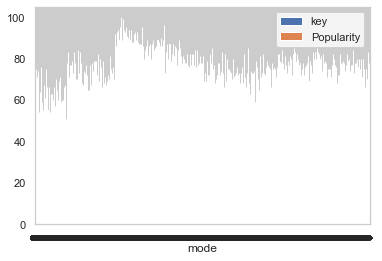

In [54]:
df.plot(x="mode", y=["key", "Popularity"], kind="bar")

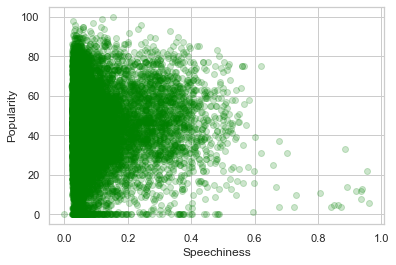

In [55]:
plt.scatter(df['speechiness'], df['Popularity'], alpha = 0.2, color = 'green')
plt.xlabel("Speechiness")
plt.ylabel("Popularity")
plt.show() 

<AxesSubplot:xlabel='time_signature', ylabel='Popularity'>

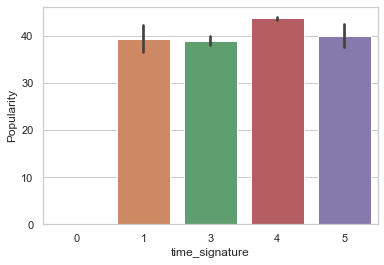

In [56]:
sns.barplot(x = 'time_signature', y = 'Popularity', data = df)

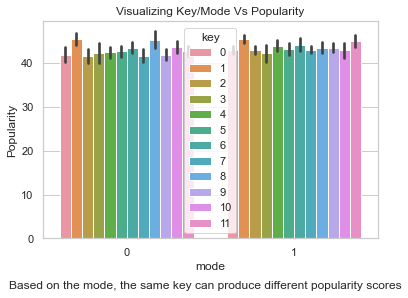

In [58]:
sns.barplot(x = 'mode', y = 'Popularity', hue = 'key', data = df)
plt.title("Visualizing Key/Mode Vs Popularity")
txt="Based on the mode, the same key can produce different popularity scores"
plt.figtext(0.5, -0.05, txt, wrap=True, horizontalalignment='center', fontsize=12)
plt.savefig("../graphs/popularity_based_on_key_after_drop.png", bbox_inches="tight")

/Users/sarah_prakriti_peters/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='acousticness', ylabel='Density'>

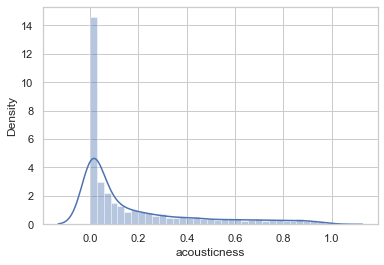

In [59]:
popular_greater_50 = df[df.Popularity > 50]
sns.distplot(popular_greater_50['acousticness'])

/Users/sarah_prakriti_peters/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='acousticness', ylabel='Density'>

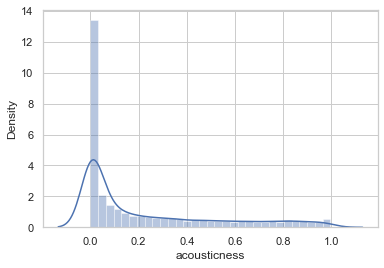

In [60]:
popular_less_50 = df[df.Popularity <= 50]
sns.distplot(popular_less_50['acousticness'])

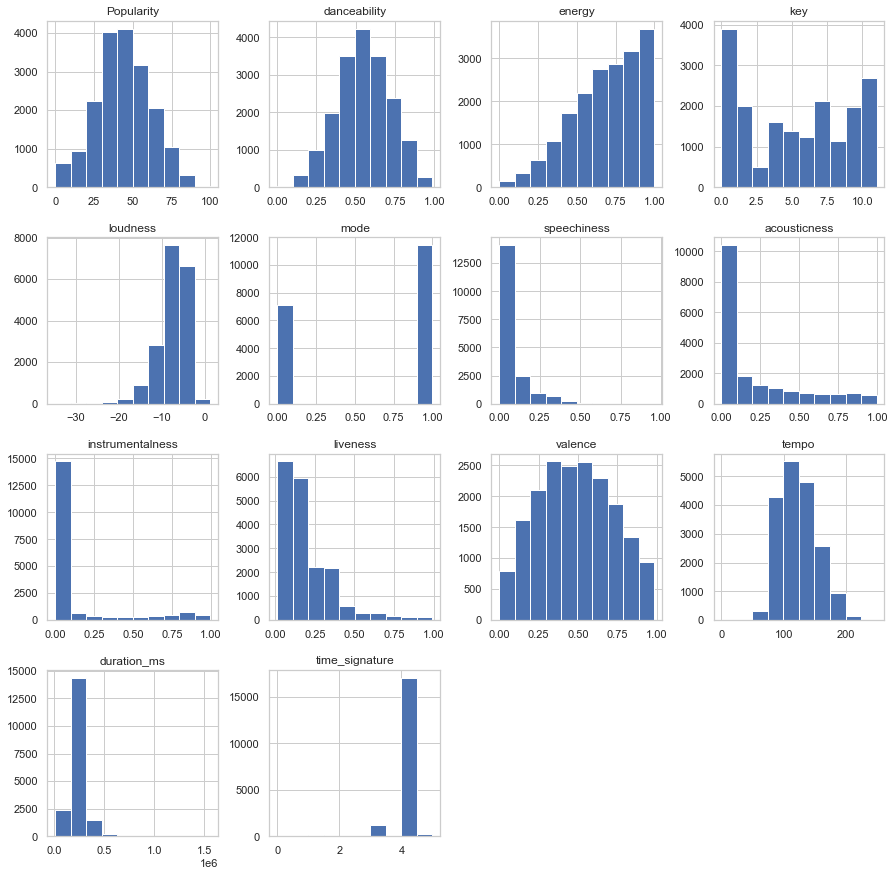

In [61]:
df.hist(figsize=(15, 15))
plt.show()

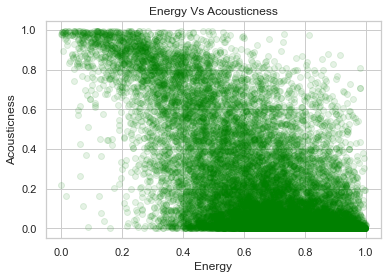

In [62]:
plt.scatter(df['energy'], df['acousticness'], alpha = 0.1, color = 'green')
plt.xlabel("Energy")
plt.ylabel("Acousticness")
plt.title("Energy Vs Acousticness")
plt.show() 

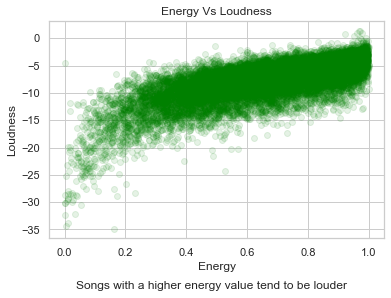

In [63]:
plt.scatter(df['energy'], df['loudness'], alpha = 0.1, color = 'green')
plt.xlabel("Energy")
plt.ylabel("Loudness")
plt.title("Energy Vs Loudness")
txt = "Songs with a higher energy value tend to be louder"
plt.figtext(0.5, -0.05, txt, wrap=True, horizontalalignment='center', fontsize=12)
plt.savefig("../graphs/energy_vs_loudness_after_drop.png", bbox_inches="tight")

In [64]:
df['energy'].corr(df['loudness'])

0.7301116336542298

Text(0.5, 1.0, 'Danceability Vs Tempo')

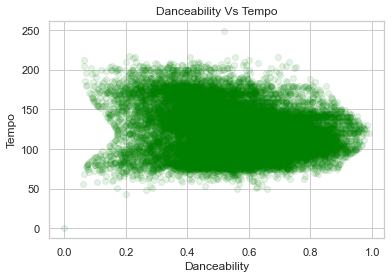

In [65]:
plt.scatter(df['danceability'], df['tempo'], alpha = 0.1, color = 'green')
plt.xlabel("Danceability")
plt.ylabel("Tempo")
plt.title("Danceability Vs Tempo")
# plt.savefig("graphs/energy_vs_loudness.png", bbox_inches="tight")

In [66]:
df['loudness'].describe()

count    18554.00000
mean        -7.48425
std          3.50200
min        -34.82500
25%         -9.11300
50%         -6.81700
75%         -5.08225
max          1.35500
Name: loudness, dtype: float64

(array([5.000e+00, 2.000e+01, 2.800e+01, 8.800e+01, 2.240e+02, 9.050e+02,
        2.809e+03, 7.638e+03, 6.625e+03, 2.120e+02]),
 array([-34.825, -31.207, -27.589, -23.971, -20.353, -16.735, -13.117,
         -9.499,  -5.881,  -2.263,   1.355]),
 <BarContainer object of 10 artists>)

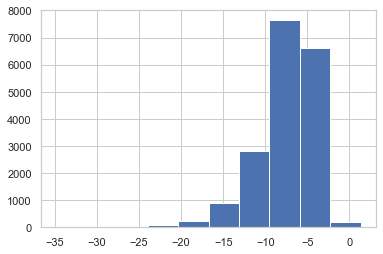

In [67]:
plt.hist(df['loudness'])

In [68]:
pop_df = pd.read_csv("../data/pop_music_data.csv")
rock_df = pd.read_csv("../data/rock_music_data.csv")
alt_df = pd.read_csv("../data/alternative_music_data.csv")
indie_df = pd.read_csv("../data/indie_alt_music_data.csv")
hiphop_df = pd.read_csv("../data/hiphop_music_data.csv")
metal_df = pd.read_csv("../data/metal_music_data.csv")
blues_df = pd.read_csv("../data/blues_music_data.csv")

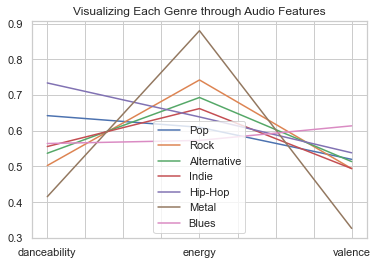

In [69]:
pop_df[['danceability','energy', 'valence']].mean().plot(legend=True)
rock_df[['danceability','energy', 'valence']].mean().plot(legend=True)
alt_df[['danceability','energy', 'valence']].mean().plot(legend=True)
indie_df[['danceability','energy', 'valence']].mean().plot(legend=True)
hiphop_df[['danceability','energy', 'valence']].mean().plot(legend=True)
metal_df[['danceability','energy', 'valence']].mean().plot(legend=True)
blues_df[['danceability','energy', 'valence']].mean().plot(legend=True)
plt.legend(["Pop","Rock","Alternative","Indie","Hip-Hop","Metal","Blues"])
plt.xticks(rotation=0)
plt.title("Visualizing Each Genre through Audio Features")
plt.show()
# plt.savefig("archive/genre_visualization.png", bbox_inches="tight")

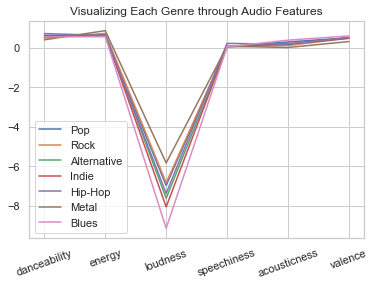

In [70]:
pop_df[['danceability','energy','loudness','speechiness','acousticness','valence']].mean().plot(legend=True)
rock_df[['danceability','energy','loudness','speechiness','acousticness','valence']].mean().plot(legend=True)
alt_df[['danceability','energy','loudness','speechiness','acousticness','valence']].mean().plot(legend=True)
indie_df[['danceability','energy','loudness','speechiness','acousticness','valence']].mean().plot(legend=True)
hiphop_df[['danceability','energy','loudness','speechiness','acousticness','valence']].mean().plot(legend=True)
metal_df[['danceability','energy','loudness','speechiness','acousticness','valence']].mean().plot(legend=True)
blues_df[['danceability','energy','loudness','speechiness','acousticness','valence']].mean().plot(legend=True)
plt.legend(["Pop","Rock","Alternative","Indie","Hip-Hop","Metal","Blues"])
plt.xticks(rotation=20)
plt.title("Visualizing Each Genre through Audio Features")
plt.show()
# plt.savefig("archive/genre_visualization.png", bbox_inches="tight")

In [71]:
killers_df = df[df['Artist_Name']=='The Killers']
killers_df.shape

(18, 22)

In [76]:
artist_df[artist_df['Artist_Name']=='The Killers']

,index,Artist_Name,danceability,Songs
46,2988,The Killers,0.476833,18


In [72]:
kdf = killers_df[killers_df['Track_Name']=="Mr. Brightside"]
kdf[['Track_Name', 'Popularity']]

,Track_Name,Popularity
5782,Mr. Brightside,82


In [79]:
df['Track_Name'].value_counts()

Trouble                                                            8
Voices                                                             8
Ghost                                                              8
Dreams                                                             8
Control                                                            8
                                                                  ..
Boyz                                                               1
Hey Stupid, I Love You - Spanglish Version                         1
Ur Gonna Wish U Believed Me                                        1
Stacy's Mom                                                        1
A Plague Of Lighthouse Keepers (Medley) - 2005 Digital Remaster    1
Name: Track_Name, Length: 17239, dtype: int64